In [1]:
import pandas as pd # data operation and data Wrangling
import numpy as np # number operation in array

#visualizing libraries
import matplotlib.pyplot as plt # data visualisation
import seaborn as sns # data visualisation


#data preprocessing
from sklearn.preprocessing import StandardScaler # standardization for feature scaling
from sklearn.model_selection import GridSearchCV # for hyperparameter tunning
from sklearn.model_selection import train_test_split # split the data into train and test
from sklearn.model_selection import RandomizedSearchCV #for hyperparameter tunning

#Model
from sklearn.tree import DecisionTreeClassifier #Decisiontree
from sklearn.ensemble import RandomForestClassifier # Randomforest

from sklearn.linear_model import LogisticRegression #logistic
from sklearn.svm import SVC # support vector machine

#evaluators
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score,classification_report # for evaluation metrics



import warnings
warnings.filterwarnings('ignore') #

In [3]:
#loading the data
df = pd.read_csv('mobile price prediction.csv')


df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [3]:
df.shape

(2000, 21)

In [4]:


df.size

42000

In [5]:

df.isnull().sum() #check the null values

,0
battery_power,0
blue,0
clock_speed,0
dual_sim,0
fc,0
four_g,0
int_memory,0
m_dep,0
mobile_wt,0
n_cores,0


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [7]:

df.shape

(2000, 21)

In [8]:
# 3G will work on 4G phones, but 4G won't work on 3G phones
df.drop(columns=['three_g'],inplace=True)

Correlation between the features and the target variable (price_range)

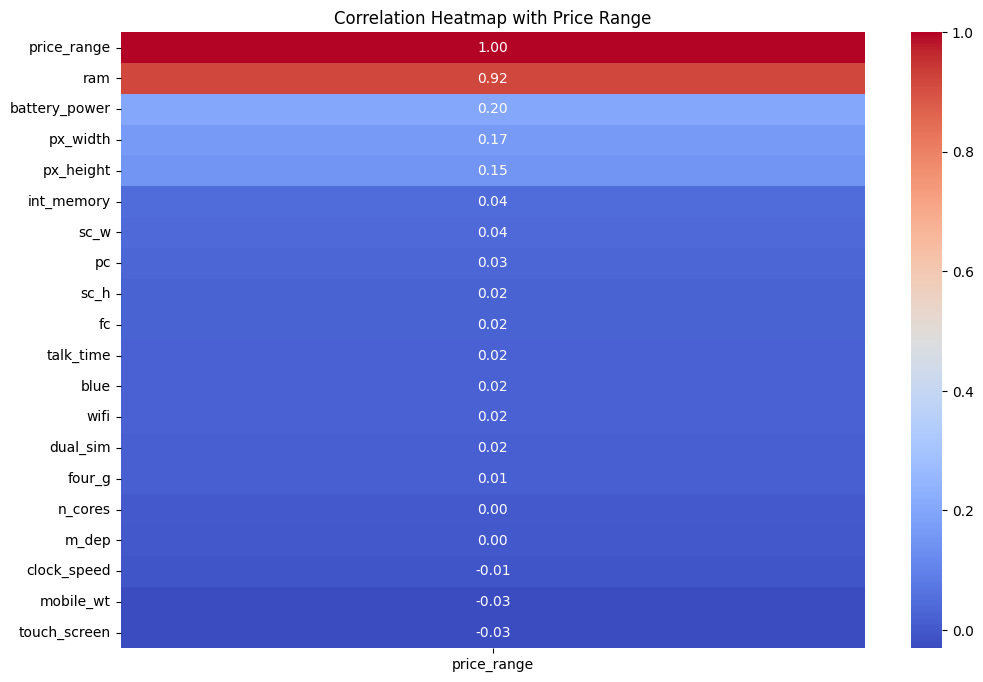

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create the heatmap
plt.figure(figsize=(12, 8))  # Adjust figure size as needed
sns.heatmap(correlation_matrix[['price_range']].sort_values(by=['price_range'], ascending=False),
            annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap with Price Range")
plt.show()

In [10]:
import pandas as pd

# Assuming 'df' is your DataFrame
correlations = df.corr()['price_range'].drop('price_range')
print(correlations)

battery_power    0.200723
blue             0.020573
clock_speed     -0.006606
dual_sim         0.017444
fc               0.021998
four_g           0.014772
int_memory       0.044435
m_dep            0.000853
mobile_wt       -0.030302
n_cores          0.004399
pc               0.033599
px_height        0.148858
px_width         0.165818
ram              0.917046
sc_h             0.022986
sc_w             0.038711
talk_time        0.021859
touch_screen    -0.030411
wifi             0.018785
Name: price_range, dtype: float64


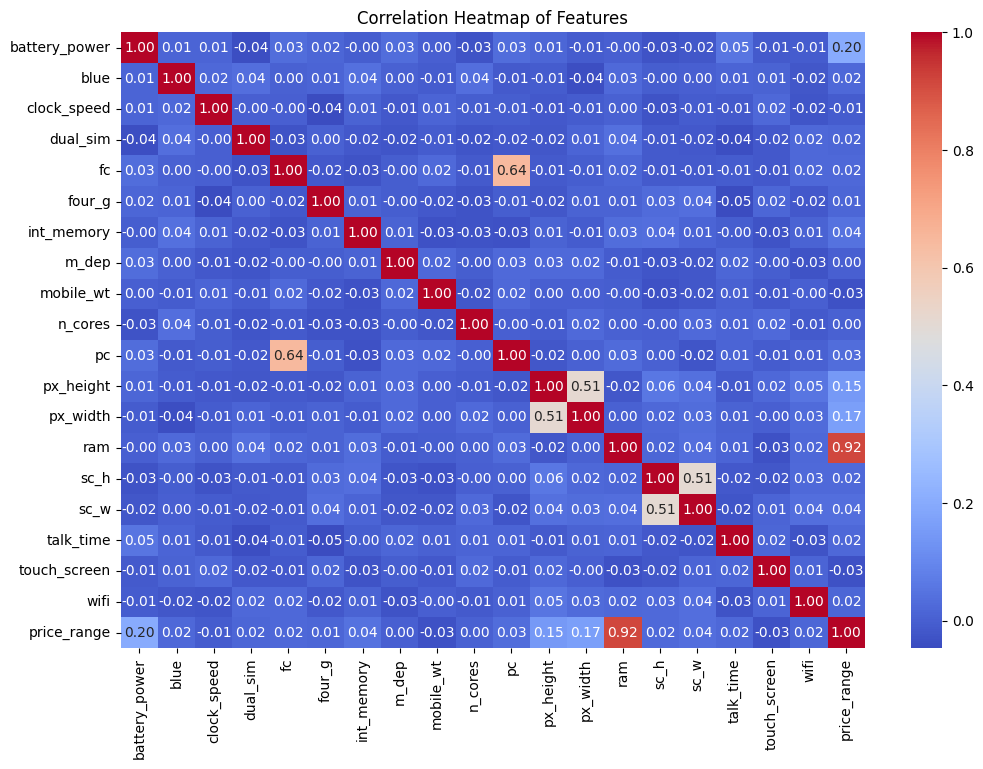

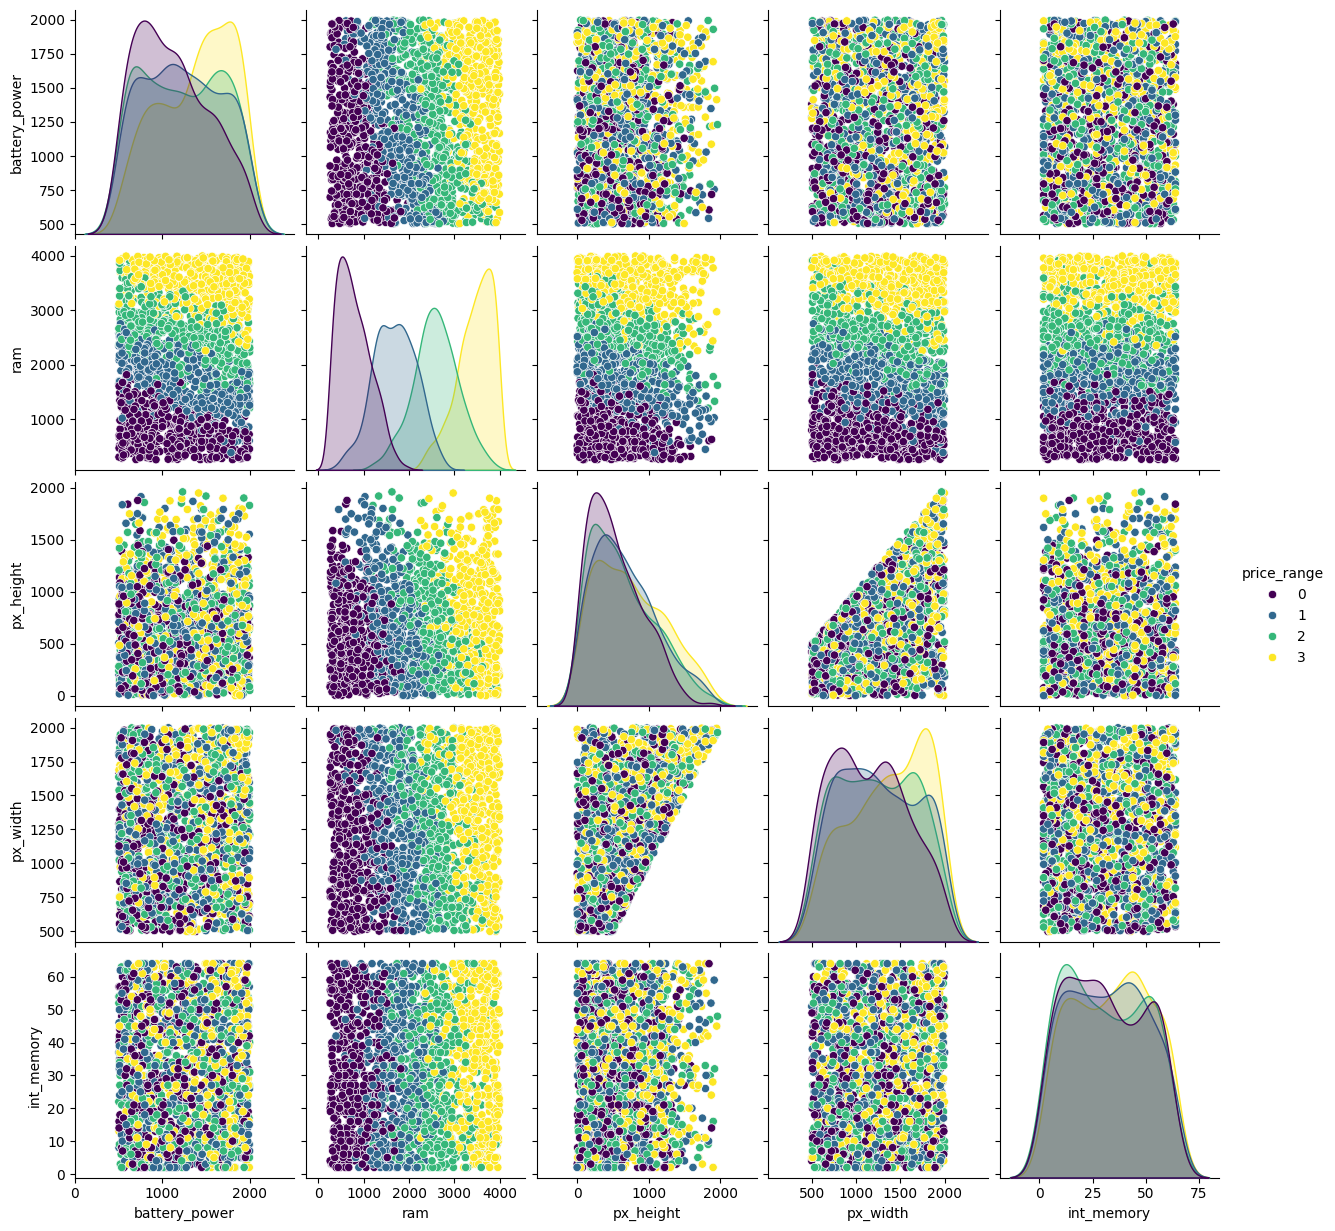

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation heatmap for numerical features
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap of Features")
plt.show()

# Pairplot to explore feature relationships with price_range
# Replace 'px_height' and 'px_width' with 'Pixels Dimension'
sns.pairplot(df, vars=['battery_power', 'ram', 'px_height', 'px_width', 'int_memory'],
             hue='price_range', palette='viridis', diag_kind='kde')
plt.show()

In [34]:
#findng the groupby analysis among the colunmns
df.groupby('price_range').mean()
df


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,0


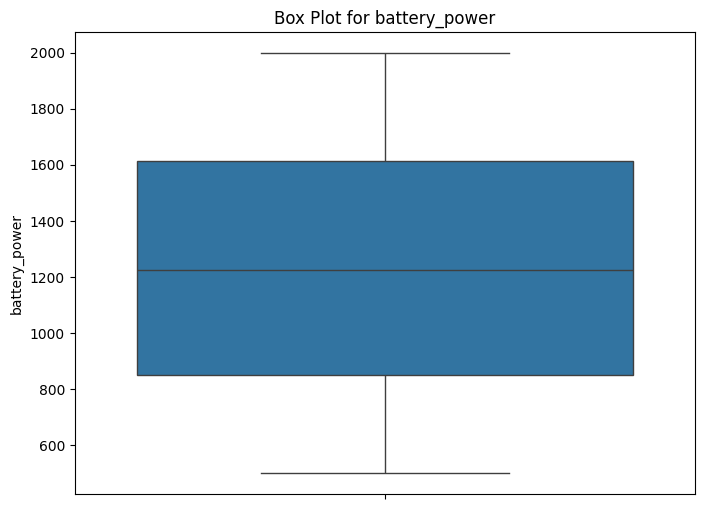

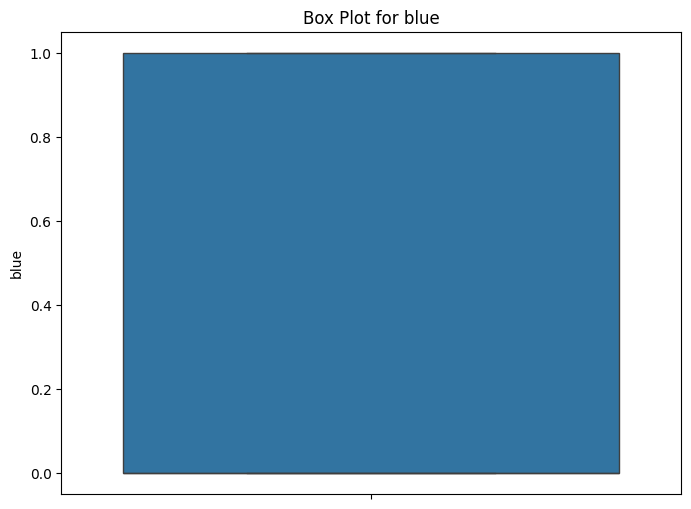

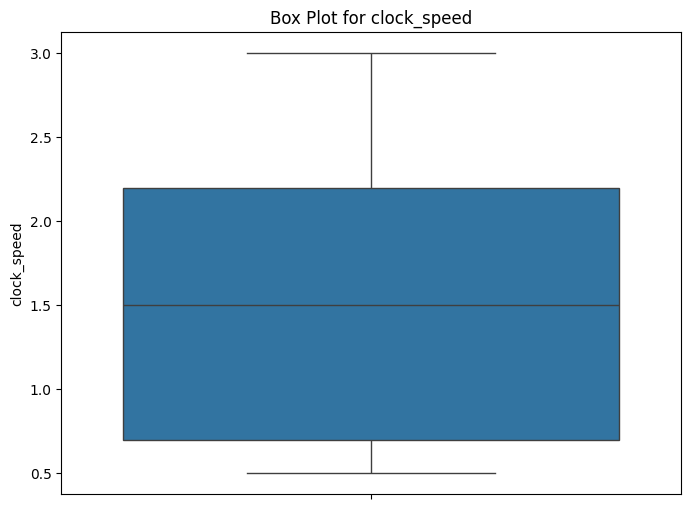

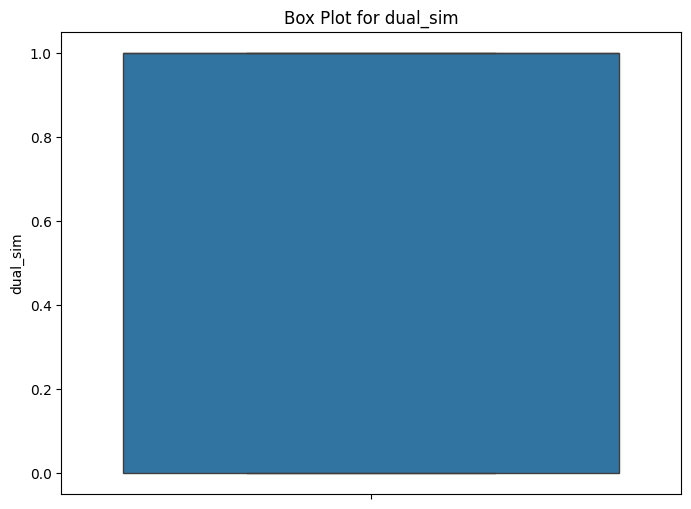

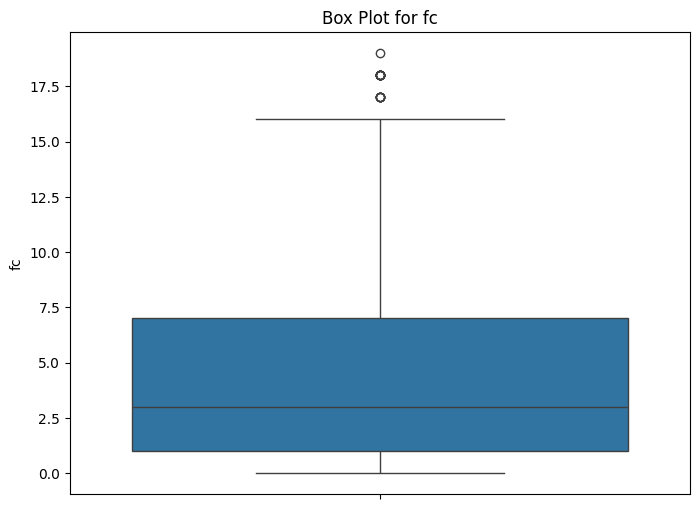

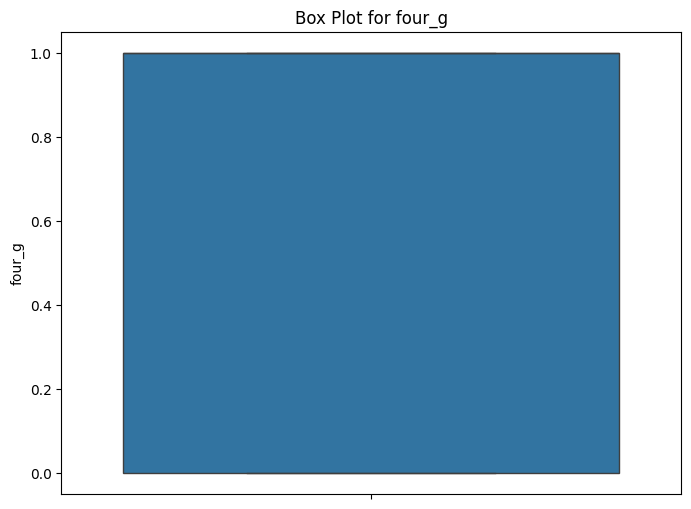

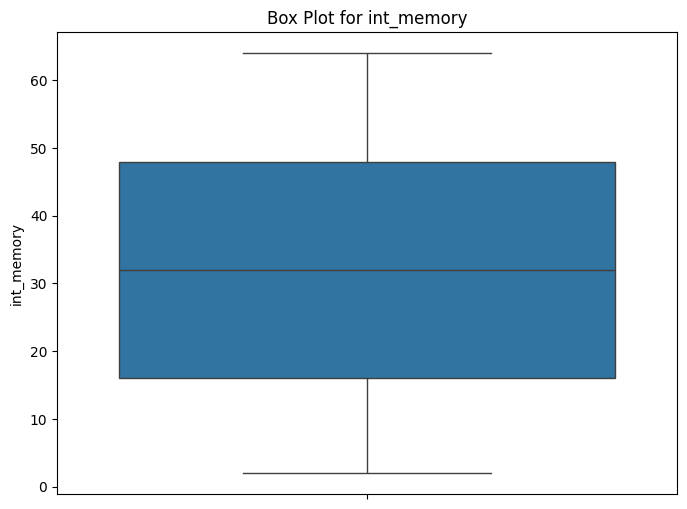

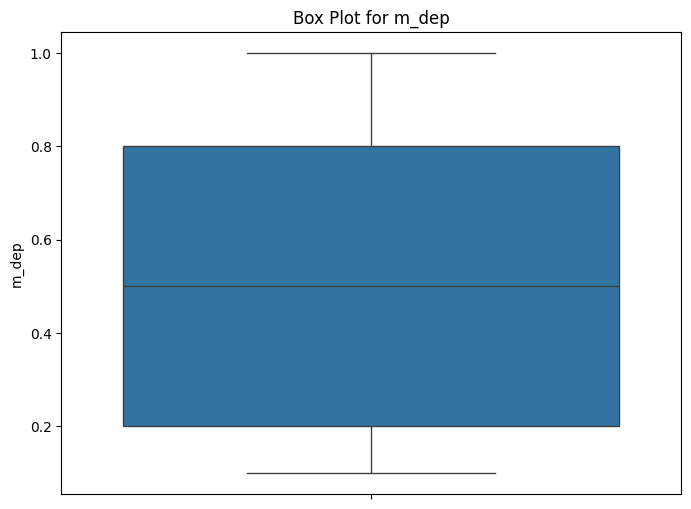

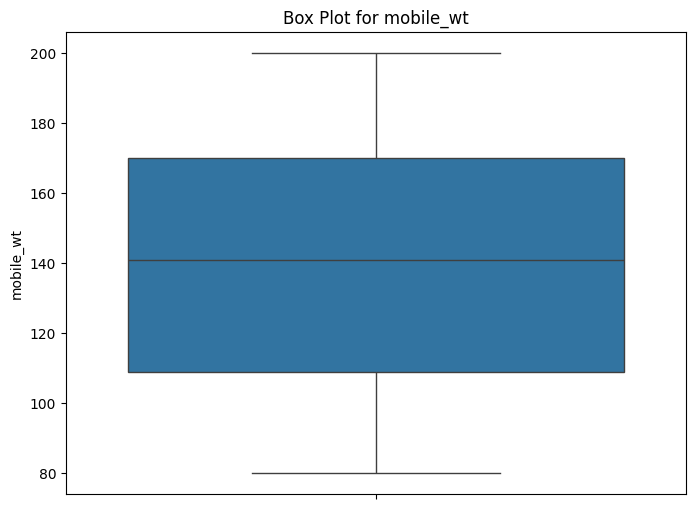

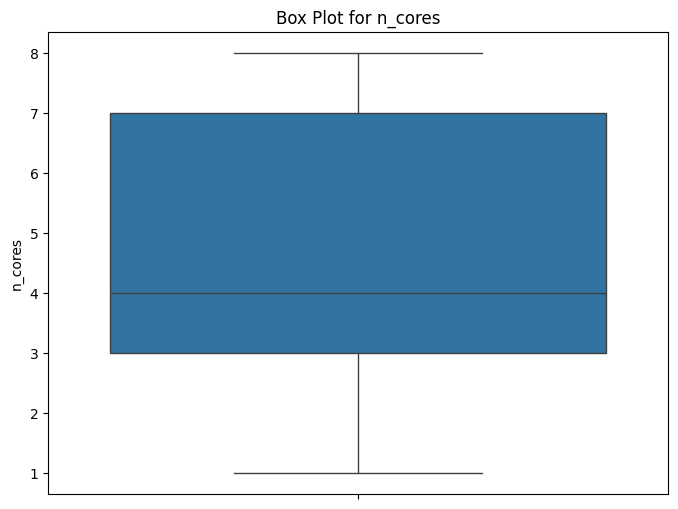

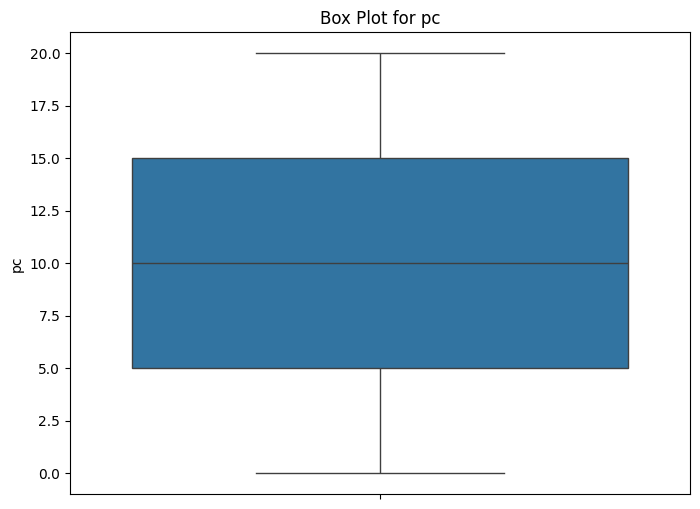

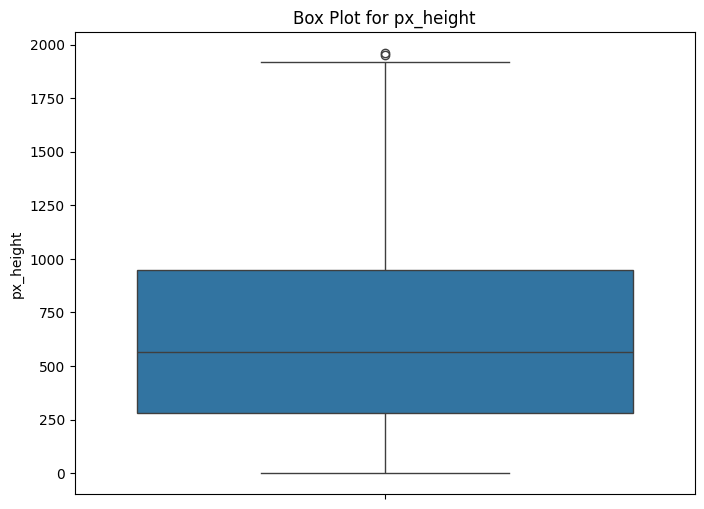

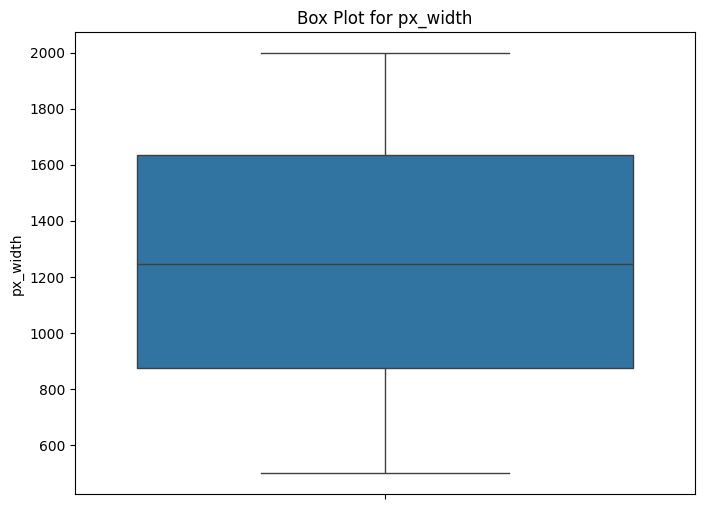

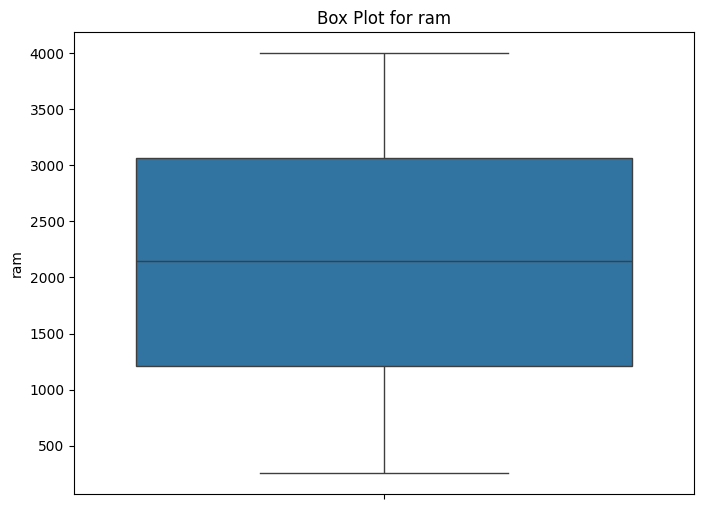

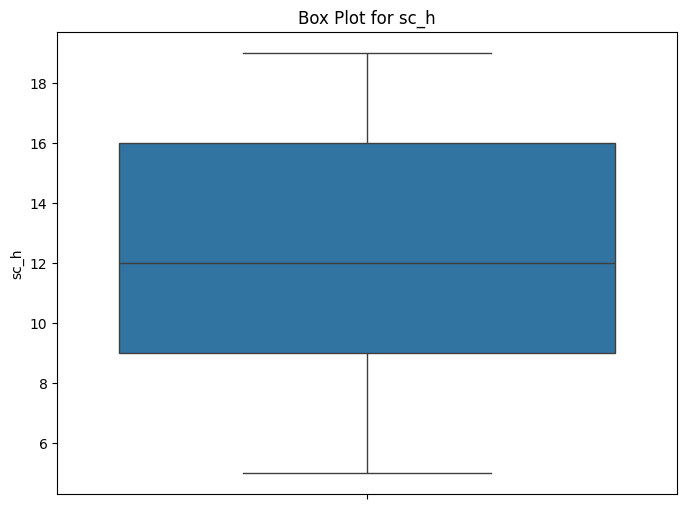

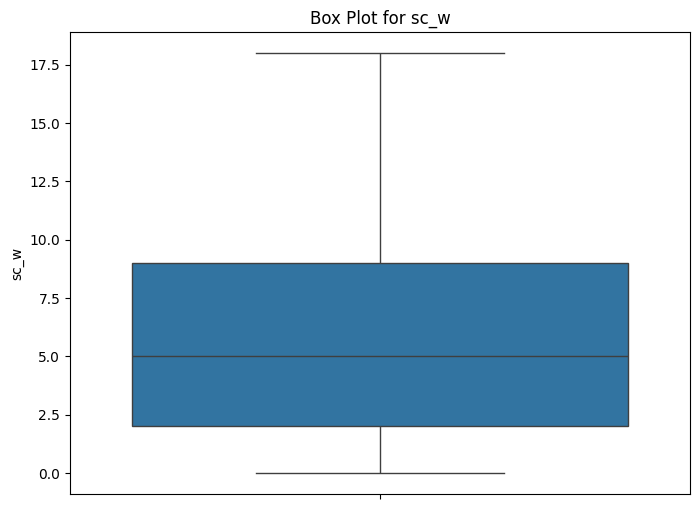

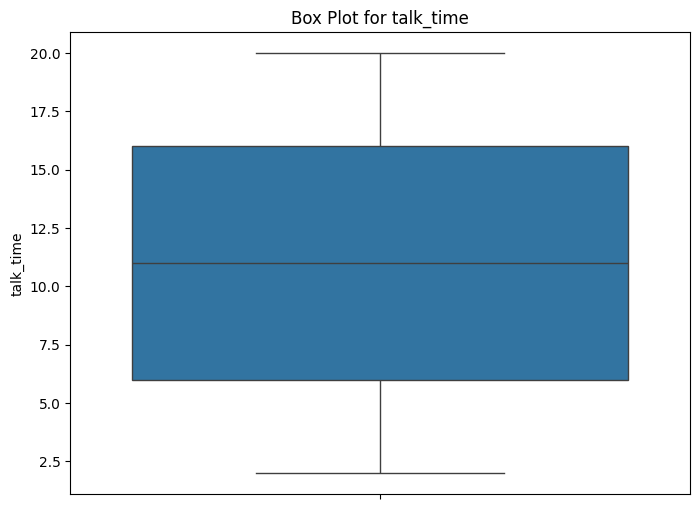

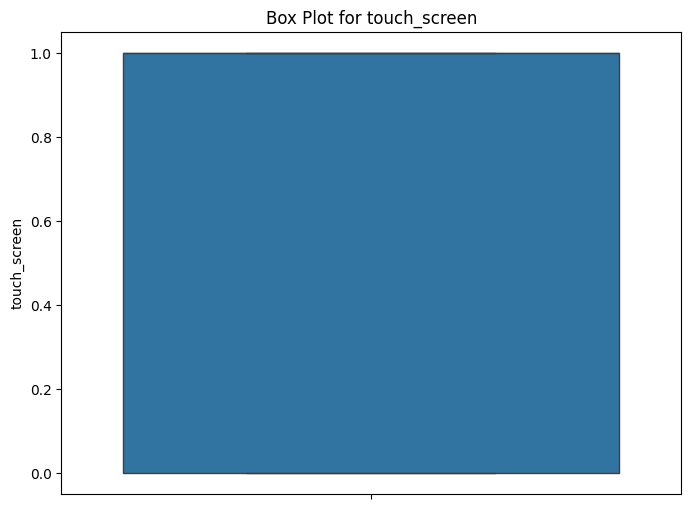

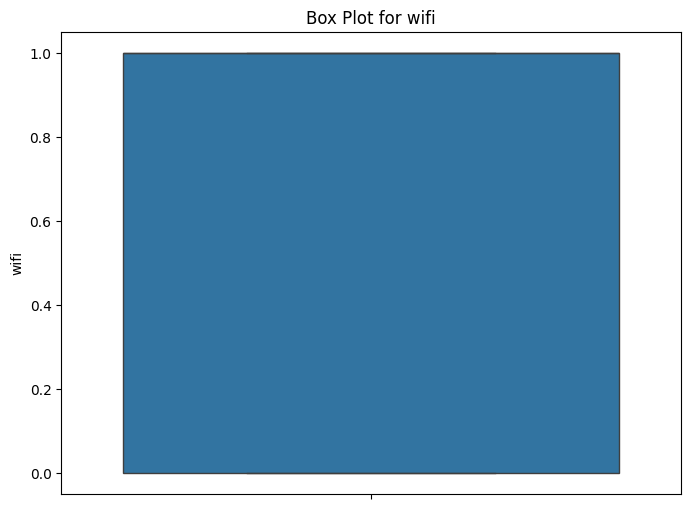

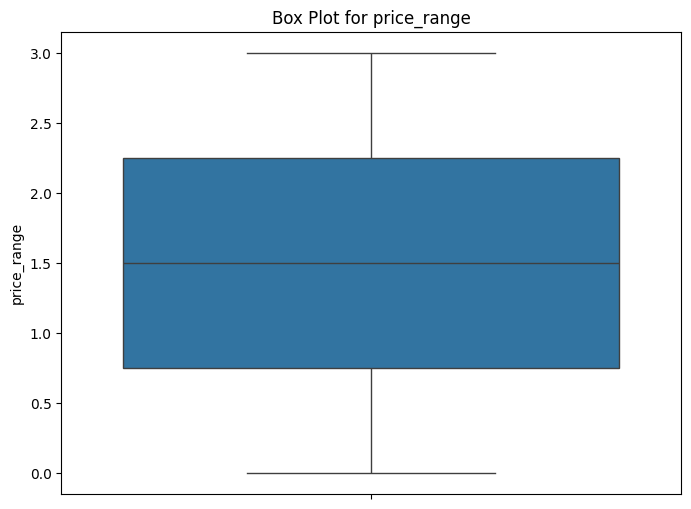

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the list of numerical columns
numerical_cols = df.select_dtypes(include=['number']).columns

# Create individual box plots for each numerical column
for col in numerical_cols:
    plt.figure(figsize=(8, 6))  # Adjust figure size as needed
    sns.boxplot(y=df[col])  # Use 'y' to plot vertically
    plt.title(f"Box Plot for {col}")
    plt.ylabel(col)  # Label the y-axis
    plt.show()

#Generate a Correlation Matrix:

Generate a Correlation Matrix:

Compute the correlation between all features and the target variable (price_range).
Identify Weak Correlations:

Focus on the correlation values between features and price_range.
Features with very low absolute correlation values can be considered for removal (e.g., a threshold like |correlation| < 0.1).
Drop Weak Features:

Remove these features from the dataset and proceed with the classification or further analysis.

In [13]:
# Calculate correlation with the target variable (price_range)
correlation_with_target = df.corr()['price_range'].drop('price_range')

# Define a threshold for low correlation
threshold = 0.1

# Identify features with low correlation
weak_features = correlation_with_target[abs(correlation_with_target) < threshold].index.tolist()

# Drop weak features from the dataset
reduced_data = df.drop(columns=weak_features)

# Display the weak features and the new dataset structure
weak_features, reduced_data.head()


(['blue',
  'clock_speed',
  'dual_sim',
  'fc',
  'four_g',
  'int_memory',
  'm_dep',
  'mobile_wt',
  'n_cores',
  'pc',
  'sc_h',
  'sc_w',
  'talk_time',
  'touch_screen',
  'wifi'],
    battery_power  px_height  px_width   ram  price_range
 0            842         20       756  2549            1
 1           1021        905      1988  2631            2
 2            563       1263      1716  2603            2
 3            615       1216      1786  2769            2
 4           1821       1208      1212  1411            1)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  touch_screen   2000 non-null   int64  
 18  wifi    

In [15]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,0,1


Decision tree algorithm

In [20]:
# Assuming df is your original DataFrame containing both features and target
dependent_variable = 'price_range'
independent_varaible = list(set(df.columns.tolist()) - {dependent_variable})

# stored the independent and dependent values in x and y variable respectively
x = df[independent_varaible].values
y = df[dependent_variable].values

# Ensure x and y have the same number of samples before splitting
assert x.shape[0] == y.shape[0], "Number of samples in features and target do not match"

# split the data into 4 parts x_train, x_test, y_train, y_test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0, stratify=y)

# Now proceed with model training
dec = DecisionTreeClassifier(max_depth=3)
dec.fit(x_train, y_train)
y_pred = dec.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("\nClassification Report:\n", report)

# Predicting on the training set
train_predictions = dec.predict(x_train)

# Calculating the training accuracy
train_accuracy = accuracy_score(y_train, train_predictions)

# Predicting on the test set
y_test_pred = dec.predict(x_test)  # Use dec to predict on x_test
testing_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy}")
print("Testing Accuracy:", testing_accuracy)

Accuracy: 0.752

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.78      0.85       125
           1       0.65      0.86      0.74       125
           2       0.68      0.52      0.59       125
           3       0.78      0.84      0.81       125

    accuracy                           0.75       500
   macro avg       0.76      0.75      0.75       500
weighted avg       0.76      0.75      0.75       500

Training Accuracy: 0.7693333333333333
Testing Accuracy: 0.752


In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# ... (your existing data loading and splitting code) ...

# Define the hyperparameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [4],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'ccp_alpha': np.logspace(-4, 0, 5)  # Add ccp_alpha for pruning
}

# Create the Decision Tree Classifier
dec = DecisionTreeClassifier(random_state=0)

# Create StratifiedKFold for cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=dec, param_grid=param_grid,
                          scoring='accuracy', cv=cv, n_jobs=-1)

# Fit the GridSearchCV object to the training data
grid_search.fit(x_train, y_train)

# Get the best hyperparameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Hyperparameters:", best_params)
print("Best Accuracy Score:", best_score)

# Evaluate the model with the best hyperparameters on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy on Test Set:", accuracy)
print("\nClassification Report:\n", report)

# Calculate training and testing accuracy
train_accuracy = best_model.score(x_train, y_train)
testing_accuracy = best_model.score(x_test, y_test)

print(f"Training Accuracy: {train_accuracy}")
print("Testing Accuracy:", testing_accuracy)

Best Hyperparameters: {'ccp_alpha': 0.01, 'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Accuracy Score: 0.8053333333333335
Accuracy on Test Set: 0.78

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.87      0.89       125
           1       0.76      0.70      0.72       125
           2       0.63      0.81      0.71       125
           3       0.89      0.74      0.81       125

    accuracy                           0.78       500
   macro avg       0.80      0.78      0.78       500
weighted avg       0.80      0.78      0.78       500

Training Accuracy: 0.818
Testing Accuracy: 0.78


In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# ... (your existing data loading and splitting code) ...

# Define the hyperparameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [4],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'ccp_alpha': np.logspace(-4, 0, 5)
}

# Create the Decision Tree Classifier
dec = DecisionTreeClassifier(random_state=0)

# Create StratifiedKFold for cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=dec, param_grid=param_grid,
                          scoring='accuracy', cv=cv, n_jobs=-1)

# Fit the GridSearchCV object to the training data
grid_search.fit(x_train, y_train)

# Get the best hyperparameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Hyperparameters:", best_params)
print("Best Accuracy Score:", best_score)

# Evaluate the model with the best hyperparameters on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy on Test Set:", accuracy)
print("\nClassification Report:\n", report)

# Calculate training and testing accuracy
train_accuracy = best_model.score(x_train, y_train)
testing_accuracy = best_model.score(x_test, y_test)

print(f"Training Accuracy: {train_accuracy}")
print("Testing Accuracy:", testing_accuracy)

# --- Calculate Null Accuracy, K-Fold Score, and GridCV Score ---

# 1. Null Accuracy
most_frequent_class =  pd.Series(y_train).mode()[0]   # Get the most frequent class in y_train
null_accuracy = accuracy_score(y_test, np.full(len(y_test), most_frequent_class))

# 2. K-Fold Score (using original data and default DecisionTreeClassifier)
kfold_scores = []
for train_index, test_index in cv.split(x, y):
    X_train_fold, X_test_fold = x[train_index], x[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]

    dec_fold = DecisionTreeClassifier(random_state=0)
    dec_fold.fit(X_train_fold, y_train_fold)

    y_pred_fold = dec_fold.predict(X_test_fold)
    kfold_scores.append(accuracy_score(y_test_fold, y_pred_fold))

# 3. GridCV Score (already calculated as best_score)
gridcv_score = best_score  # You already have this from GridSearchCV

# Print the results
print("\n--- Evaluation Metrics ---")
print(f"Null Accuracy: {null_accuracy:.4f}")
print(f"K-Fold Scores: {kfold_scores}")
print(f"Average K-Fold Score: {np.mean(kfold_scores):.4f}")
print(f"GridCV Score: {gridcv_score:.4f}")

Best Hyperparameters: {'ccp_alpha': 0.01, 'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Accuracy Score: 0.8053333333333335
Accuracy on Test Set: 0.78

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.87      0.89       125
           1       0.76      0.70      0.72       125
           2       0.63      0.81      0.71       125
           3       0.89      0.74      0.81       125

    accuracy                           0.78       500
   macro avg       0.80      0.78      0.78       500
weighted avg       0.80      0.78      0.78       500

Training Accuracy: 0.818
Testing Accuracy: 0.78

--- Evaluation Metrics ---
Null Accuracy: 0.2500
K-Fold Scores: [0.8575, 0.8375, 0.8025, 0.8425, 0.82]
Average K-Fold Score: 0.8320
GridCV Score: 0.8053


Logistic Regression

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score

# Load the dataset
file_path = 'mobile price prediction.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Separate features and target
X = data.drop('price_range', axis=1)
y = data['price_range']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the scaled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train a Logistic Regression model on scaled data
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

# Make predictions
y_pred = log_reg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("\nClassification Report:\n", report)

# Make prediction on the training data
y_train_pred = log_reg.predict(X_train) #This line is added to fix the NameError
y_test_pred = log_reg.predict(X_test)

# Calculate accuracies
training_accuracy = accuracy_score(y_train, y_train_pred)
testing_accuracy = accuracy_score(y_test, y_test_pred)

# Print results
print("Training Accuracy:", training_accuracy)
print("Testing Accuracy:", testing_accuracy)

Accuracy: 0.9775

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99       105
           1       0.95      1.00      0.97        91
           2       0.99      0.95      0.97        92
           3       0.97      0.99      0.98       112

    accuracy                           0.98       400
   macro avg       0.98      0.98      0.98       400
weighted avg       0.98      0.98      0.98       400

Training Accuracy: 0.975625
Testing Accuracy: 0.9775


[[117   8   0   0]
 [ 23  93   9   0]
 [  0  30  72  23]
 [  0   0   6 119]]


<Axes: >

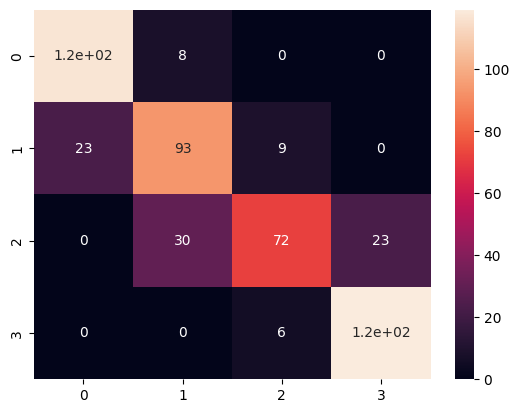

In [38]:
#confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
#Visualize the cm
import seaborn as sns
sns.heatmap(cm, annot=True)

In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# ... (your existing data loading and preprocessing code) ...

# 1. Null Accuracy
# Calculate the most frequent class in the training set
most_frequent_class = y_train.mode()[0]

# Calculate null accuracy
null_accuracy = accuracy_score(y_test, np.full(len(y_test), most_frequent_class))

# 2. K-Fold Score
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
kfold_scores = []

for train_index, test_index in cv.split(X_scaled, y):
    X_train_fold, X_test_fold = X_scaled[train_index], X_scaled[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]

    log_reg_fold = LogisticRegression(max_iter=1000, random_state=42)
    log_reg_fold.fit(X_train_fold, y_train_fold)

    y_pred_fold = log_reg_fold.predict(X_test_fold)
    kfold_scores.append(accuracy_score(y_test_fold, y_pred_fold))

# 3. GridCV Score
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid,
                          scoring='accuracy', cv=cv, n_jobs=-1)

grid_search.fit(X_scaled, y)  # Fit on the entire scaled data
gridcv_scores = grid_search.best_score_

# Print the results
print(f"Null Accuracy: {null_accuracy:.4f}")
print(f"K-Fold Scores: {kfold_scores}")
print(f"Average K-Fold Score: {np.mean(kfold_scores):.4f}")
print(f"GridCV Score: {gridcv_scores:.4f}")

Null Accuracy: 0.2275
K-Fold Scores: [0.9625, 0.965, 0.9575, 0.9575, 0.9625]
Average K-Fold Score: 0.9610
GridCV Score: 0.9720


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score

# Load the dataset
file_path = 'mobile price prediction.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Separate features and target
X = data.drop('price_range', axis=1)
y = data['price_range']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the scaled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Define the hyperparameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'penalty': ['l1', 'l2'],  # Regularization type
    'solver': ['liblinear', 'saga']  # Solver algorithms
}

# Create the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Create StratifiedKFold for cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Create GridSearchCV object
grid_search = GridSearchCV(
    estimator=log_reg,
    param_grid=param_grid,
    scoring='accuracy',  # Use accuracy as the scoring metric
    cv=cv,  # Use StratifiedKFold for cross-validation
    n_jobs=-1  # Use all available CPU cores for parallel processing
)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Hyperparameters:", best_params)
print("Best Accuracy Score:", best_score)

# Evaluate the model with the best hyperparameters on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy on Test Set:", accuracy)
print("\nClassification Report:\n", report)


# Calculate accuracies
training_accuracy = accuracy_score(y_train, y_train_pred)
testing_accuracy = accuracy_score(y_test, y_test_pred)

# Print results
print("Training Accuracy:", training_accuracy)
print("Testing Accuracy:", testing_accuracy)



Random Forest Classifier

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load and prepare data
data = pd.read_csv('mobile price prediction.csv')
X = data.drop('price_range', axis=1)
y = data['price_range']
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0, stratify=y)

# Create and train the model
rf_classifier = RandomForestClassifier(max_depth=3, random_state=0)  # Set max_depth=3
rf_classifier.fit(X_train, y_train)

# Make predictions and evaluate
y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Calculate training and testing accuracy using rf_classifier
train_accuracy = rf_classifier.score(X_train, y_train) * 100  # Changed rf to rf_classifier
test_accuracy = rf_classifier.score(X_test, y_test) * 100  # Changed rf to rf_classifier

print(f"Training Accuracy: {train_accuracy}")
print(f"Testing Accuracy: {test_accuracy}")



Accuracy: 0.802
Training Accuracy: 82.93333333333334
Testing Accuracy: 80.2


[[117   8   0   0]
 [ 23  93   9   0]
 [  0  30  72  23]
 [  0   0   6 119]]


<Axes: >

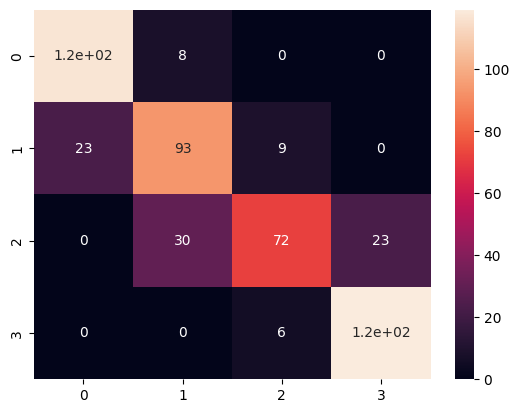

In [37]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
#Visualize the cm
import seaborn as sns
sns.heatmap(cm, annot=True)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Load and prepare data
data = pd.read_csv('mobile price prediction.csv')
X = data.drop('price_range', axis=1)
y = data['price_range']
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0, stratify=y)

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False],  # Add bootstrap option
    'ccp_alpha': [0.0, 0.01, 0.05, 0.1]  # Add cost-complexity pruning
}

# Create the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=0)

# Create StratifiedKFold for cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid,
                          scoring='accuracy', cv=cv, n_jobs=-1)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Hyperparameters:", best_params)
print("Best Accuracy Score:", best_score)

# Evaluate the model with the best hyperparameters on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy on Test Set:", accuracy)
print("\nClassification Report:\n", report)

# Calculate training and testing accuracy
train_accuracy = best_model.score(X_train, y_train)
testing_accuracy = best_model.score(X_test, y_test)

print(f"Training Accuracy: {train_accuracy}")
print("Testing Accuracy:", testing_accuracy)

In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report


# --- Calculate Null Accuracy, K-Fold Score, and GridCV Score ---

# 1. Null Accuracy
most_frequent_class = y_train.mode()[0]
null_accuracy = accuracy_score(y_test, np.full(len(y_test), most_frequent_class))

# 2. K-Fold Score (using original data and default RandomForestClassifier)
kfold_scores = []
for train_index, test_index in cv.split(X, y):  # Use original X and y
    X_train_fold, X_test_fold = X[train_index], X[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index] # Use .iloc for positional indexing

    rf_fold = RandomForestClassifier(random_state=0)
    rf_fold.fit(X_train_fold, y_train_fold)

    y_pred_fold = rf_fold.predict(X_test_fold)
    kfold_scores.append(accuracy_score(y_test_fold, y_pred_fold))

# 3. GridCV Score (already calculated as best_score)
gridcv_score = best_score

# Print the results
print("\n--- Evaluation Metrics ---")
print(f"Null Accuracy: {null_accuracy:.4f}")
print(f"K-Fold Scores: {kfold_scores}")
print(f"Average K-Fold Score: {np.mean(kfold_scores):.4f}")
print(f"GridCV Score: {gridcv_score:.4f}")


--- Evaluation Metrics ---
Null Accuracy: 0.2500
K-Fold Scores: [0.8875, 0.87, 0.89, 0.9025, 0.865]
Average K-Fold Score: 0.8830
GridCV Score: 0.7987


#classify using svm

In [10]:
#classify using svm
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score # Import accuracy_score

# Assuming 'df' is your DataFrame containing the data
# ... (Your previous code to load and prepare the data) ...

# Separate features (X) and target (y)
X = df.drop('price_range', axis=1)  # Assuming 'price_range' is your target column
y = df['price_range']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0, stratify=y)

# Now you can create and train your SVM model
svc = SVC()
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

#training accuracy
train_accuracy = svc.score(x_train, y_train)
print(f"Training Accuracy: {train_accuracy}")

#testing accuracy
test_accuracy = svc.score(x_test, y_test)
print(f"Testing Accuracy: {test_accuracy}")

Accuracy: 0.96
Training Accuracy: 0.958
Testing Accuracy: 0.96


[[117   8   0   0]
 [ 23  93   9   0]
 [  0  30  72  23]
 [  0   0   6 119]]


<Axes: >

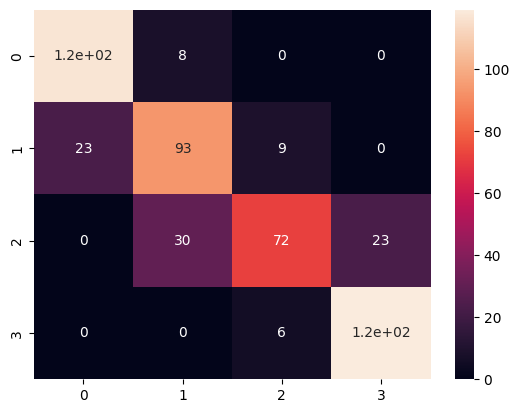

In [36]:
#confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
#Visualize the cm
import seaborn as sns
sns.heatmap(cm, annot=True)


performing the Hyperparameter tuning ,Kfold cross-validation and Grid search cv for better accuracy


In [11]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report

# ... (Your data loading and preprocessing code) ...

# 1. Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0, stratify=y)

# 2. Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 3. Define hyperparameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto', 0.1, 1],
}

# 4. Create SVM classifier
svc = SVC()

# 5. Create StratifiedKFold for cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)  # 5 folds

# 6. Create GridSearchCV object
grid_search = GridSearchCV(estimator=svc, param_grid=param_grid,
                              scoring='accuracy', cv=cv, n_jobs=-1)

# 7. Fit GridSearchCV to the data
grid_search.fit(X_train, y_train)

# 8. Get the best hyperparameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Hyperparameters:", best_params)
print("Best Accuracy Score:", best_score)

# 9. Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy on Test Set:", accuracy)
print("\nClassification Report:\n", report)

train_accuracy = best_model.score(X_train, y_train)
print(f"Training Accuracy: {train_accuracy}")

# Calculate testing accuracy
test_accuracy = best_model.score(X_test, y_test)
print(f"Testing Accuracy: {test_accuracy}")



Best Hyperparameters: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
Best Accuracy Score: 0.9673333333333334
Accuracy on Test Set: 0.96

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97       125
           1       0.94      0.95      0.94       125
           2       0.94      0.96      0.95       125
           3       0.99      0.96      0.98       125

    accuracy                           0.96       500
   macro avg       0.96      0.96      0.96       500
weighted avg       0.96      0.96      0.96       500

Training Accuracy: 0.9886666666666667
Testing Accuracy: 0.96


Finding the 'Null Accuracy': null_accuracies, 'K-Fold Score': kfold_scores, 'GridCV Score':gridcv_scores

In [12]:
import numpy as np
from sklearn.metrics import accuracy_score

# ... (Your existing code for data loading, preprocessing, and SVM classification) ...

# 1. Null Accuracy
most_frequent_class = y_train.mode()[0]  # Get the most frequent class in y_train
null_accuracy = accuracy_score(y_test, np.full(len(y_test), most_frequent_class))

# 2. K-Fold Scores
kfold_scores = []
for train_index, test_index in cv.split(X_train, y_train):  # Use cv object from GridSearchCV
    X_train_fold, X_test_fold = X_train[train_index], X_train[test_index]

    # Use .iloc to access elements by position
    y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]

    # Create and train the model for this fold
    fold_model = SVC(**best_params)  # Use best parameters from GridSearchCV
    fold_model.fit(X_train_fold, y_train_fold)

    # Make predictions and calculate accuracy for this fold
    y_pred_fold = fold_model.predict(X_test_fold)
    fold_accuracy = accuracy_score(y_test_fold, y_pred_fold)
    kfold_scores.append(fold_accuracy)

# 3. GridCV Score
gridcv_score = grid_search.best_score_  # You already have this from GridSearchCV

# Store the scores in a dictionary
scores = {
    'Null Accuracy': null_accuracy,
    'K-Fold Scores': kfold_scores,
    'GridCV Score': gridcv_score
}

print(scores)

{'Null Accuracy': 0.25, 'K-Fold Scores': [0.9666666666666667, 0.9633333333333334, 0.9666666666666667, 0.9733333333333334, 0.9666666666666667], 'GridCV Score': 0.9673333333333334}


'Model': 'Accuracy':  'Null Accuracy':
'Training Score'TestinScore':'K-FoldScore':

In [13]:
import pandas as pd

# Example data (replace these with your actual values)
models = ['Decision Tree', 'Random Forest', 'Logistic Regression', 'SVM']
accuracies = [0.75, 0.80, 0.97, 0.96]
# Adjusted null_accuracies to have 4 elements to match other lists
null_accuracies = [0.25, 0.25, 0.22, 0.25]
training_scores = [0.76, 0.82, 0.97, 0.95]
testing_scores = [0.75, 0.80, 0.97, 0.96]
kfold_scores = [0.83, 0.88, 0.96, 0.96]

# Create a DataFrame
results = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracies,
    'Null Accuracy': null_accuracies,
    'Training Score': training_scores,
    'Testing Score': testing_scores,
    'K-Fold Score': kfold_scores
})

# Save the results to a CSV file (optional)
results.to_csv('model_results.csv', index=False)

# Display the results
print(results.to_string(index=False))

              Model  Accuracy  Null Accuracy  Training Score  Testing Score  K-Fold Score
      Decision Tree      0.75           0.25            0.76           0.75          0.83
      Random Forest      0.80           0.25            0.82           0.80          0.88
Logistic Regression      0.97           0.22            0.97           0.97          0.96
                SVM      0.96           0.25            0.95           0.96          0.96
